<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
آنالیز فید ورودی به کوره در دوره ی یکساله منتهی به 14030915
</b>
</div>

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- خواندن دیتاهای تجمیع شده فید ورودی به کوره 
</b>
</div>

In [2]:
df = pd.read_csv(f"{working_dir}/data/total_feed.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)

(366, 34)


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- نرمالسازی داده ها 
</b>
</div>

In [3]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
print(normal_df.head())

(366, 34)
   Coke_1030(c)  Coke_1030(s)  Coke_1030(humidity)  Coke_1030(s112)  \
0      0.708163      0.344828             0.000000            0.534   
1      0.622449      0.310345             0.000000            0.400   
2      0.344898      0.678161             0.024528            0.428   
3      0.344898      0.678161             0.024528            0.428   
4      0.344898      0.678161             0.024528            0.428   

   Coke_1030(s112_315)  Coke_1030(s315)  Coke_Fine(c)  Coke_Fine(s)  \
0             0.934464         0.052632      0.216624      0.691358   
1             0.946429         0.052632      0.381998      0.537037   
2             0.967500         0.029474      0.381998      0.537037   
3             0.967500         0.029474      0.214470      0.641975   
4             0.967500         0.029474      0.381998      0.537037   

   Coke_Fine(humidity)  Coke_Fine(s05)  ...    dri(c)  dri(cao)  dri(sio2)  \
0             0.000000        1.000000  ...  0.646154     

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
4- محاسبه ضرایب همبستگی بین داده ها و حذف داده های با همبستگی بیشتر از 0.95 
</b>
</div>

In [4]:
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod

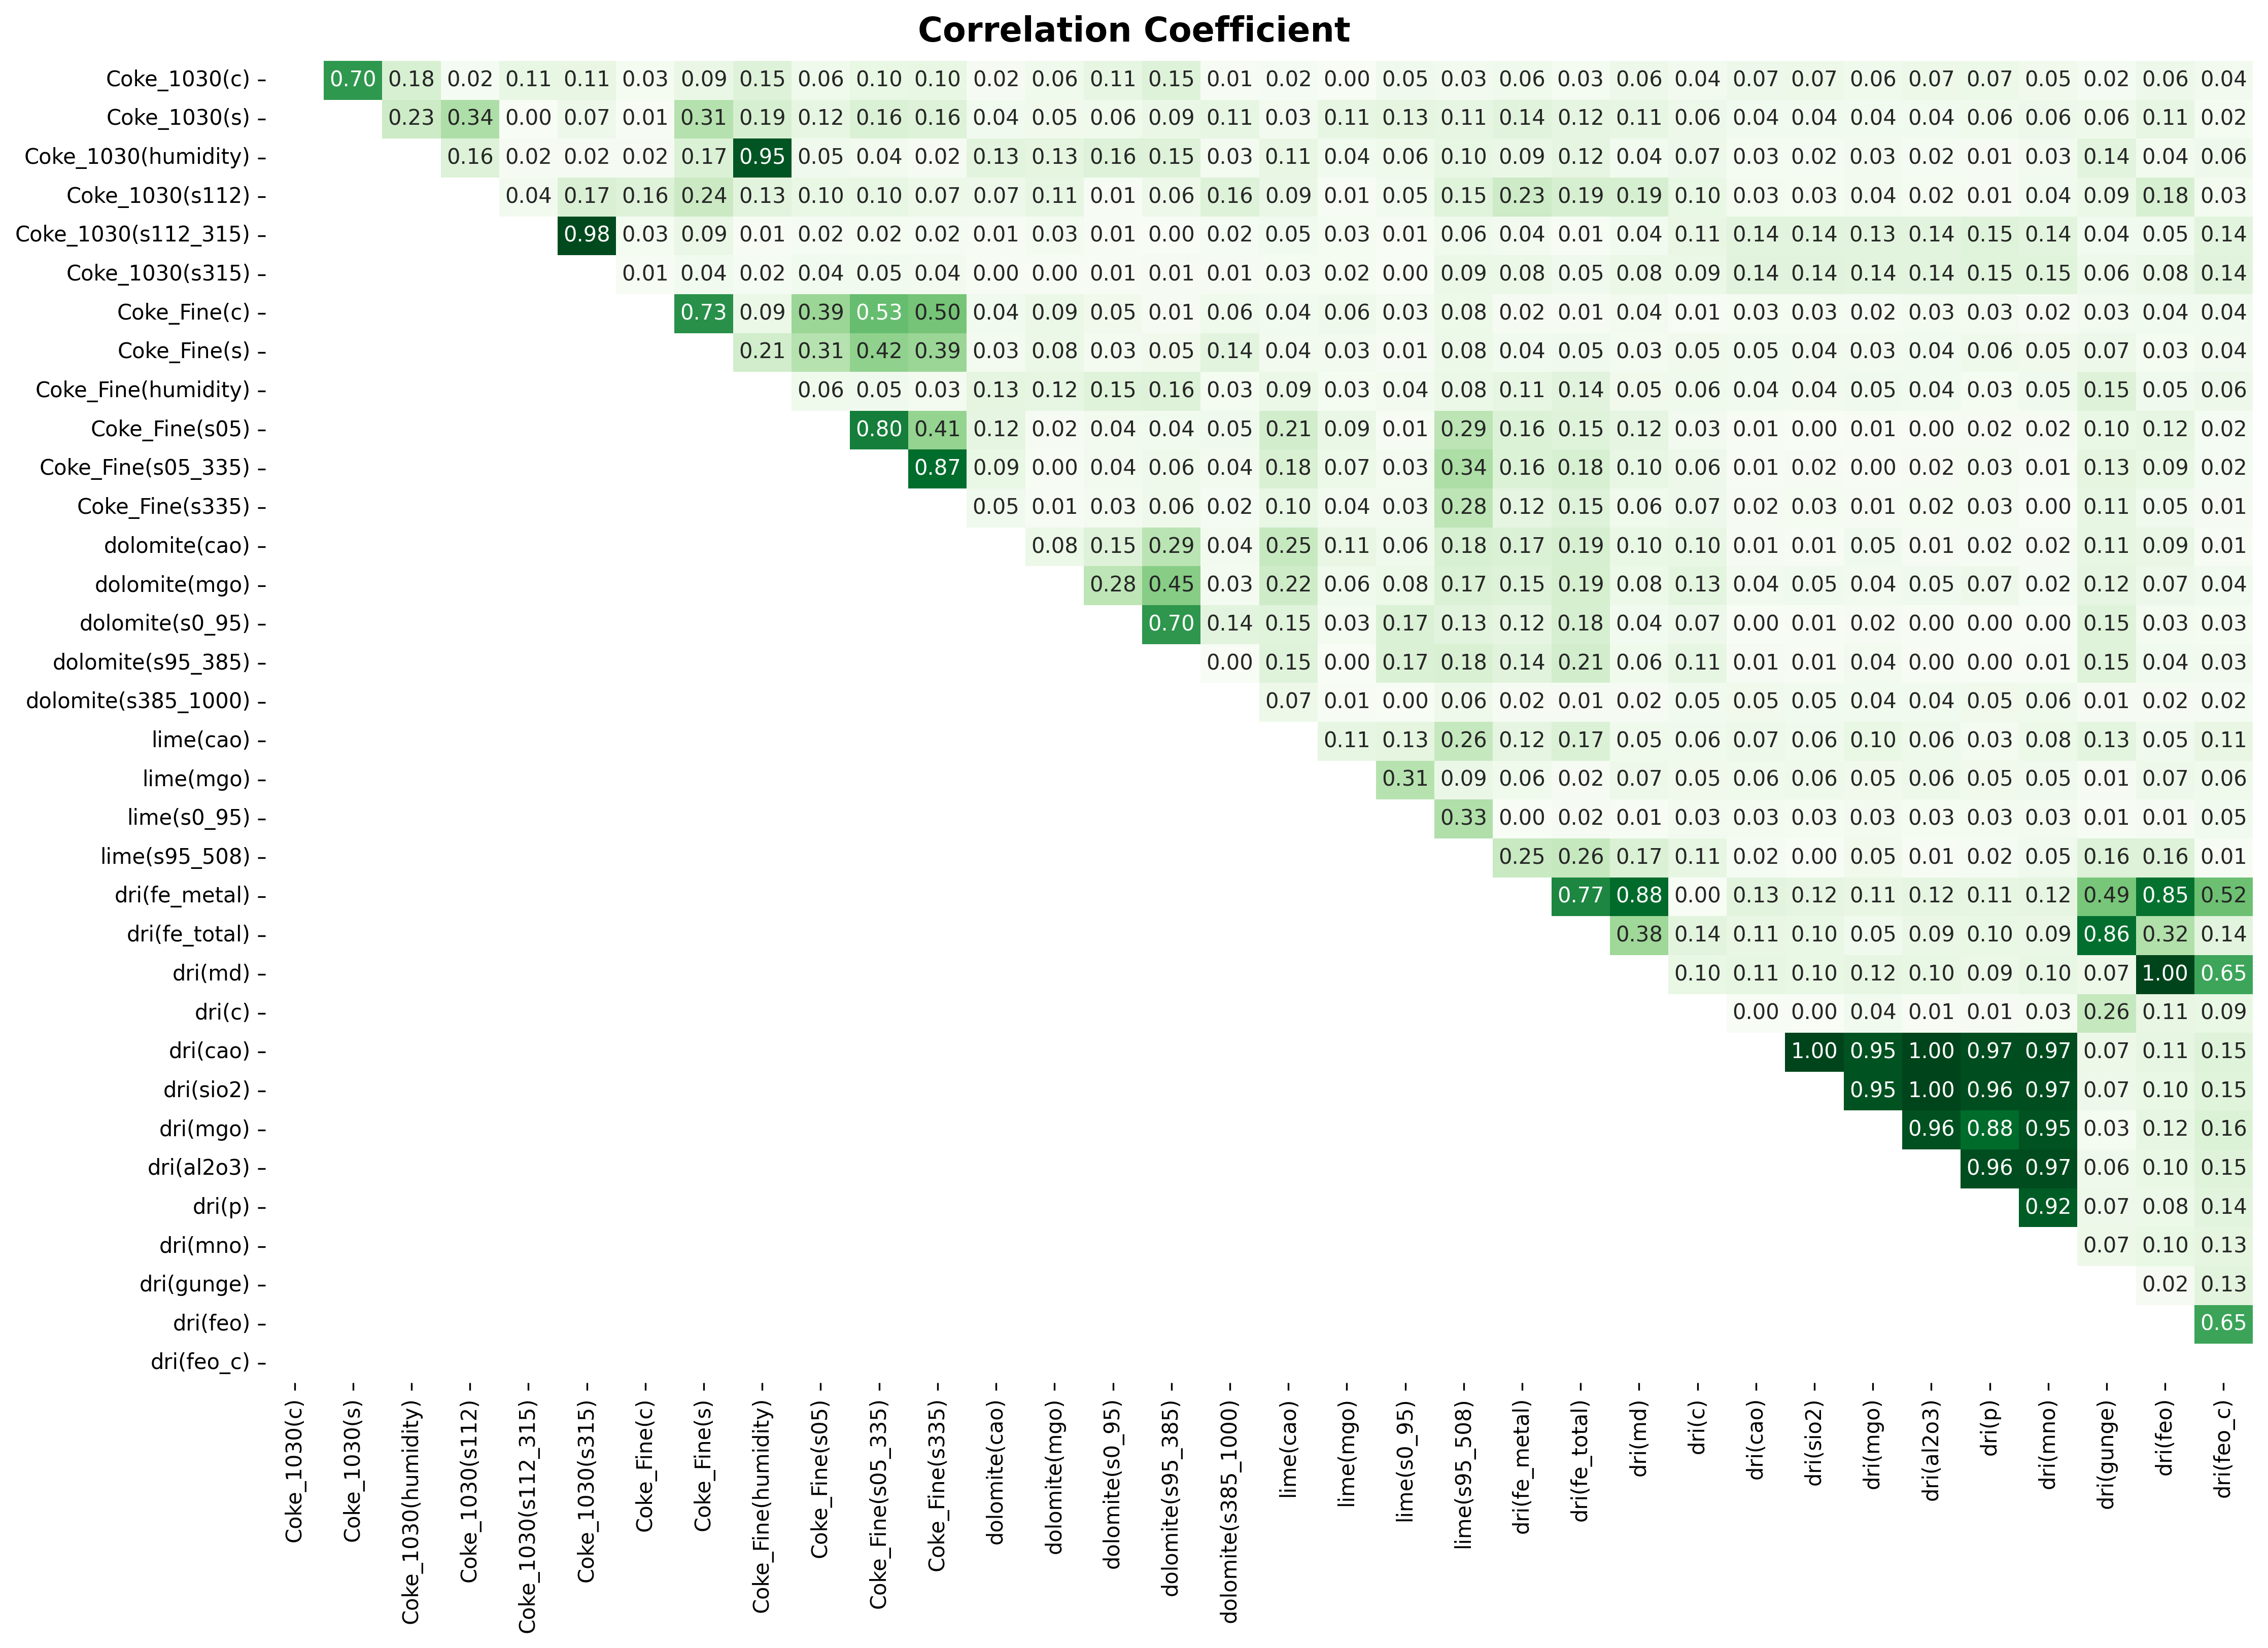

In [5]:
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Correlation Coefficient', fontsize=16,fontweight='bold')
ax1 = fig.subplots(1,1)
sns.heatmap(
    data=corr_df,
    cbar=False,
    square= False,
    fmt='.2f',
    annot=True,
    annot_kws={'size':10},
    cmap='Greens',
    ax= ax1
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/temp/Correlation_Coefficient.jpg')
plt.show()

In [6]:
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)

                      0                1
0   Coke_1030(s112_315)  Coke_1030(s315)
1               dri(md)         dri(feo)
2              dri(cao)        dri(sio2)
3              dri(cao)         dri(mgo)
4              dri(cao)       dri(al2o3)
5              dri(cao)           dri(p)
6              dri(cao)         dri(mno)
7             dri(sio2)         dri(mgo)
8             dri(sio2)       dri(al2o3)
9             dri(sio2)           dri(p)
10            dri(sio2)         dri(mno)
11             dri(mgo)       dri(al2o3)
12             dri(mgo)         dri(mno)
13           dri(al2o3)           dri(p)
14           dri(al2o3)         dri(mno)


In [7]:
df.drop(labels=['dri(feo)','dri(al2o3)','dri(p)','dri(mno)'] ,axis=1,inplace=True)

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
5- کاهش متغیرها به دوتا با استفاده از الگوریتم TSNE 
</b>
</div>

(366, 2)


/tmp/ipykernel_14544/2948009639.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


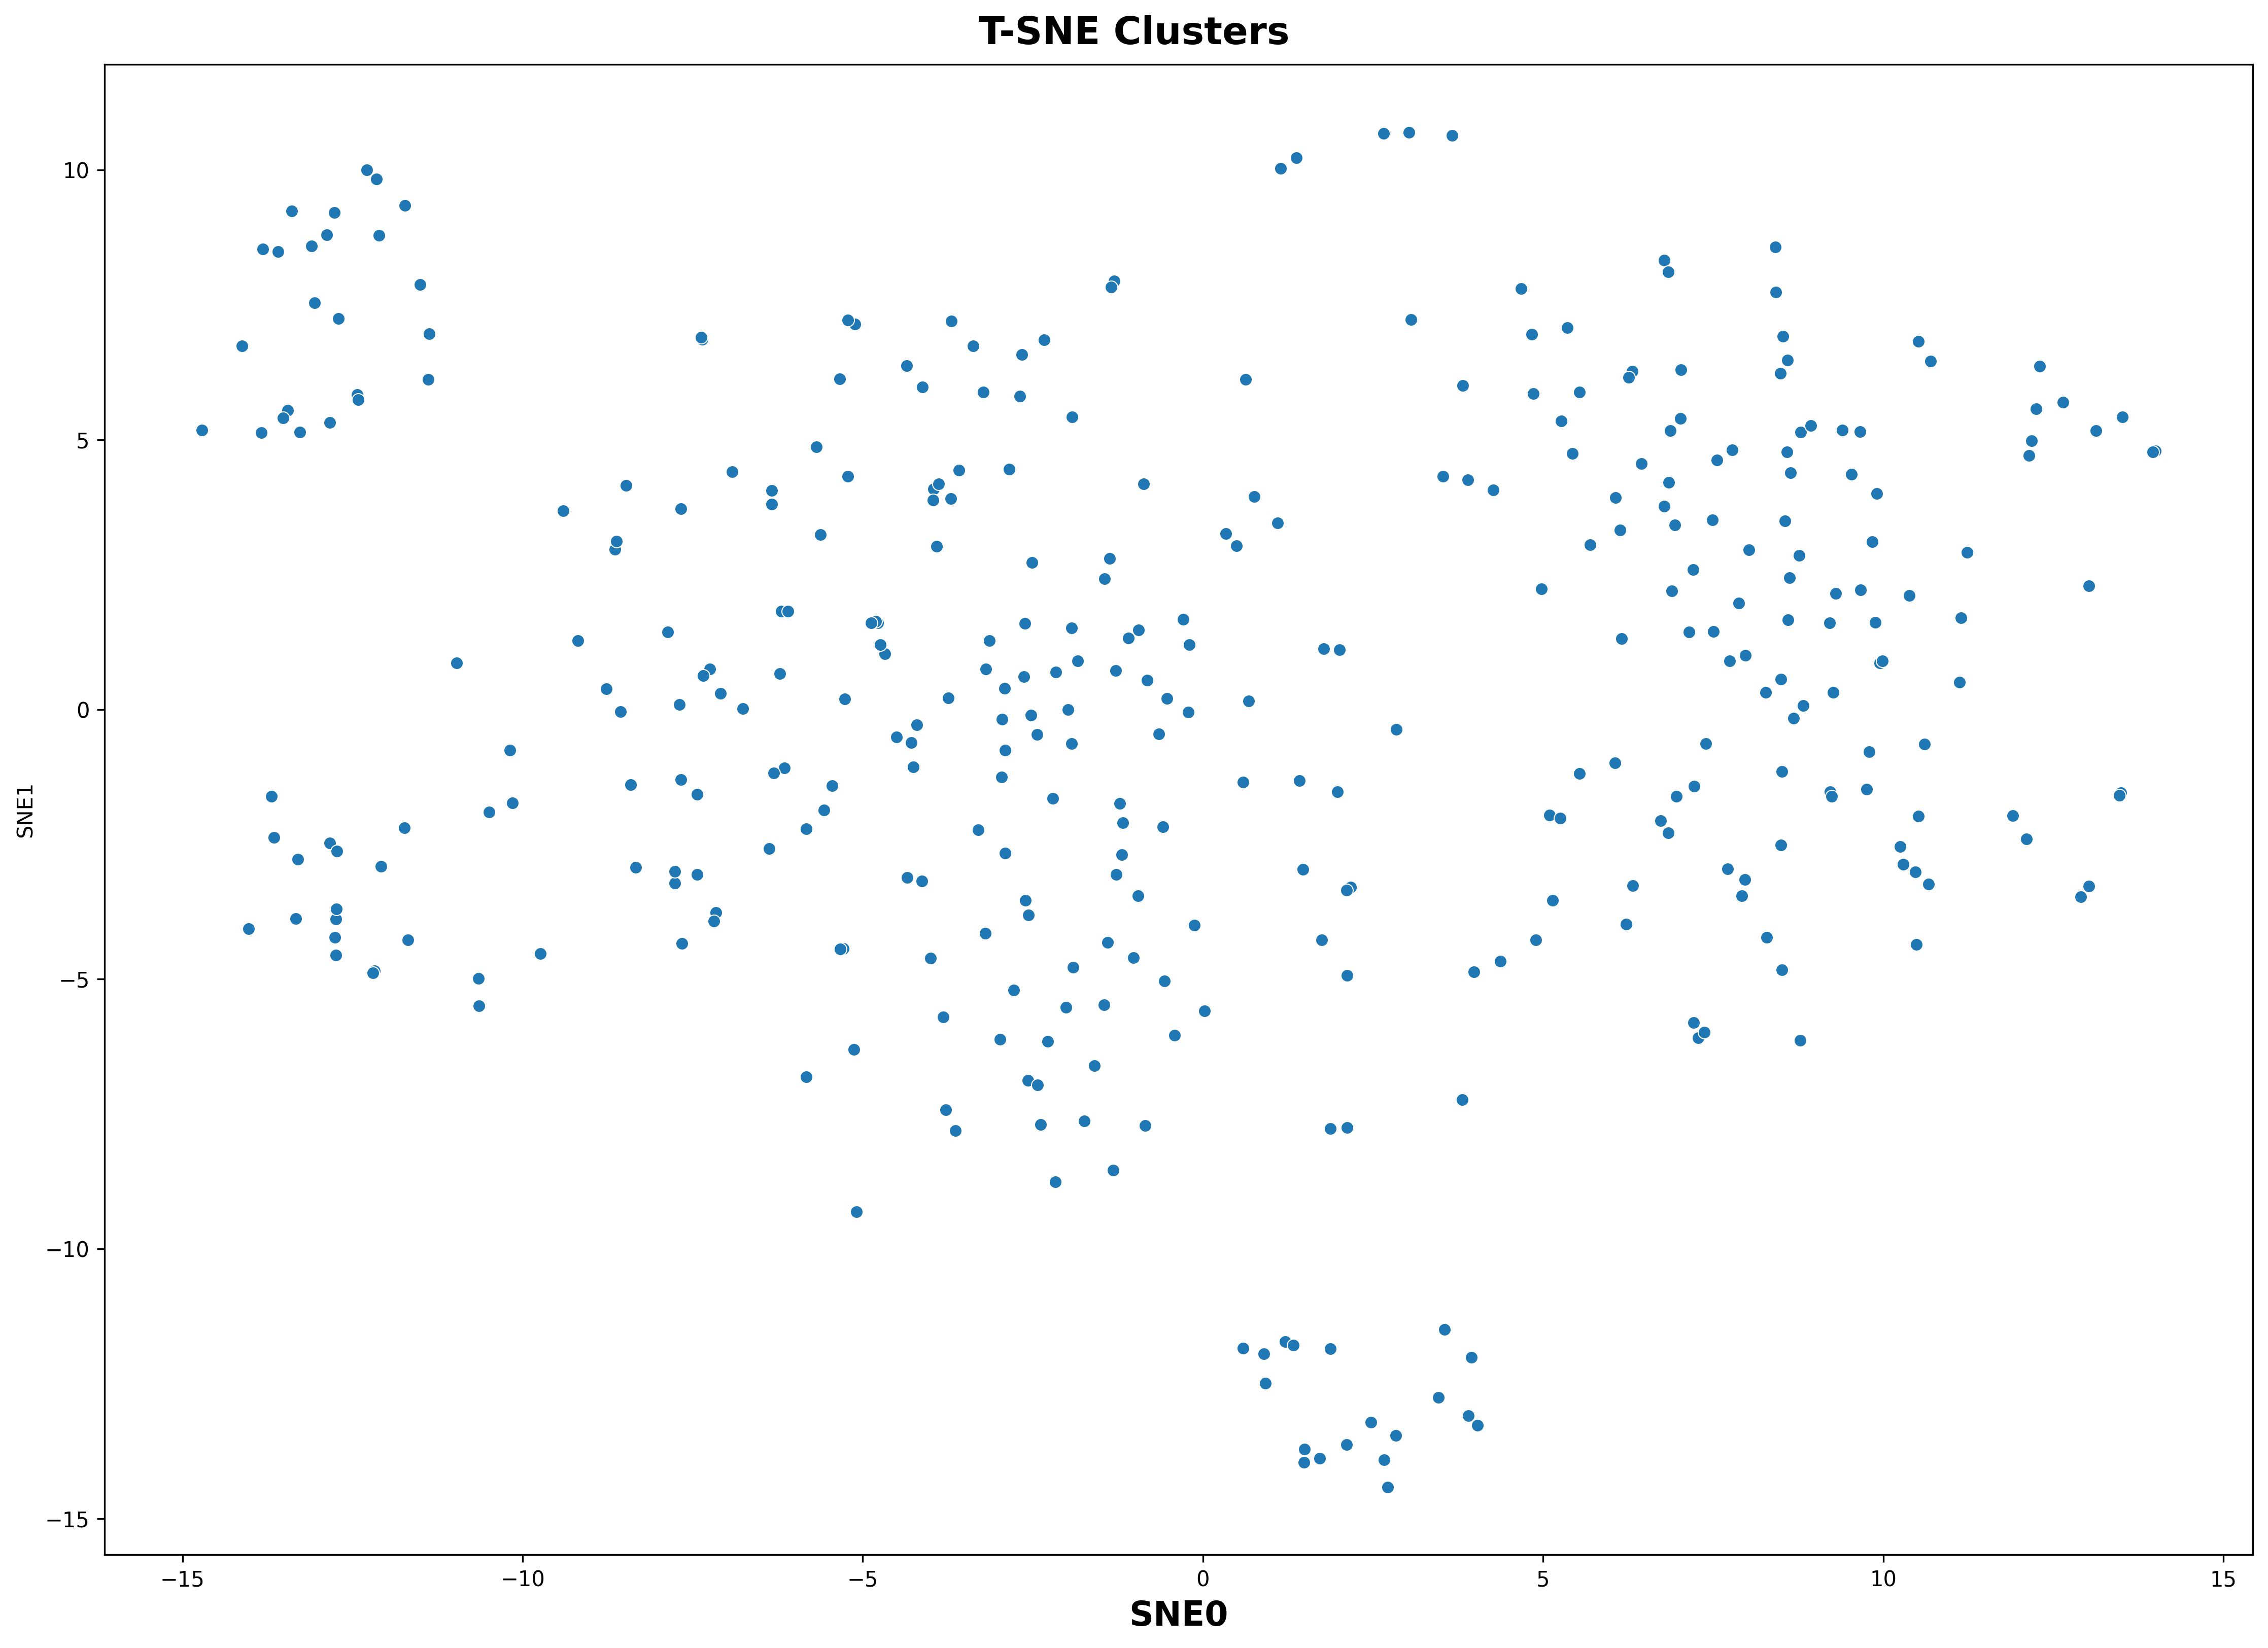

In [10]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)

t_sne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)

# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('SNE0', fontsize=16,fontweight='bold')
#ax1.set_xlim(99.7,99.9)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
#cmap = sns.light_palette('seagreen', as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    #hue=model.labels_,
    #hue_order=[0,2,3,],
    #fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
#plt.axvline(99.827, c='green')
#plt.annotate('99.827 %', xy =(99.825, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#plt.axvline(99.807, c='green')
#plt.annotate('99.807 %', xy =(99.805, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#sns.move_legend(obj = ax1, loc = 'best', labels=["Adelie", "Chinstrap", "Gentoo"])
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()
#-------------------END OF PLOT-------------

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
6- خوشه بندی داده ها با استفاده از الگوریتم Agglomerative 
</b>
</div>

[0 1 2 3]
(366,)


/tmp/ipykernel_14544/2499979458.py:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


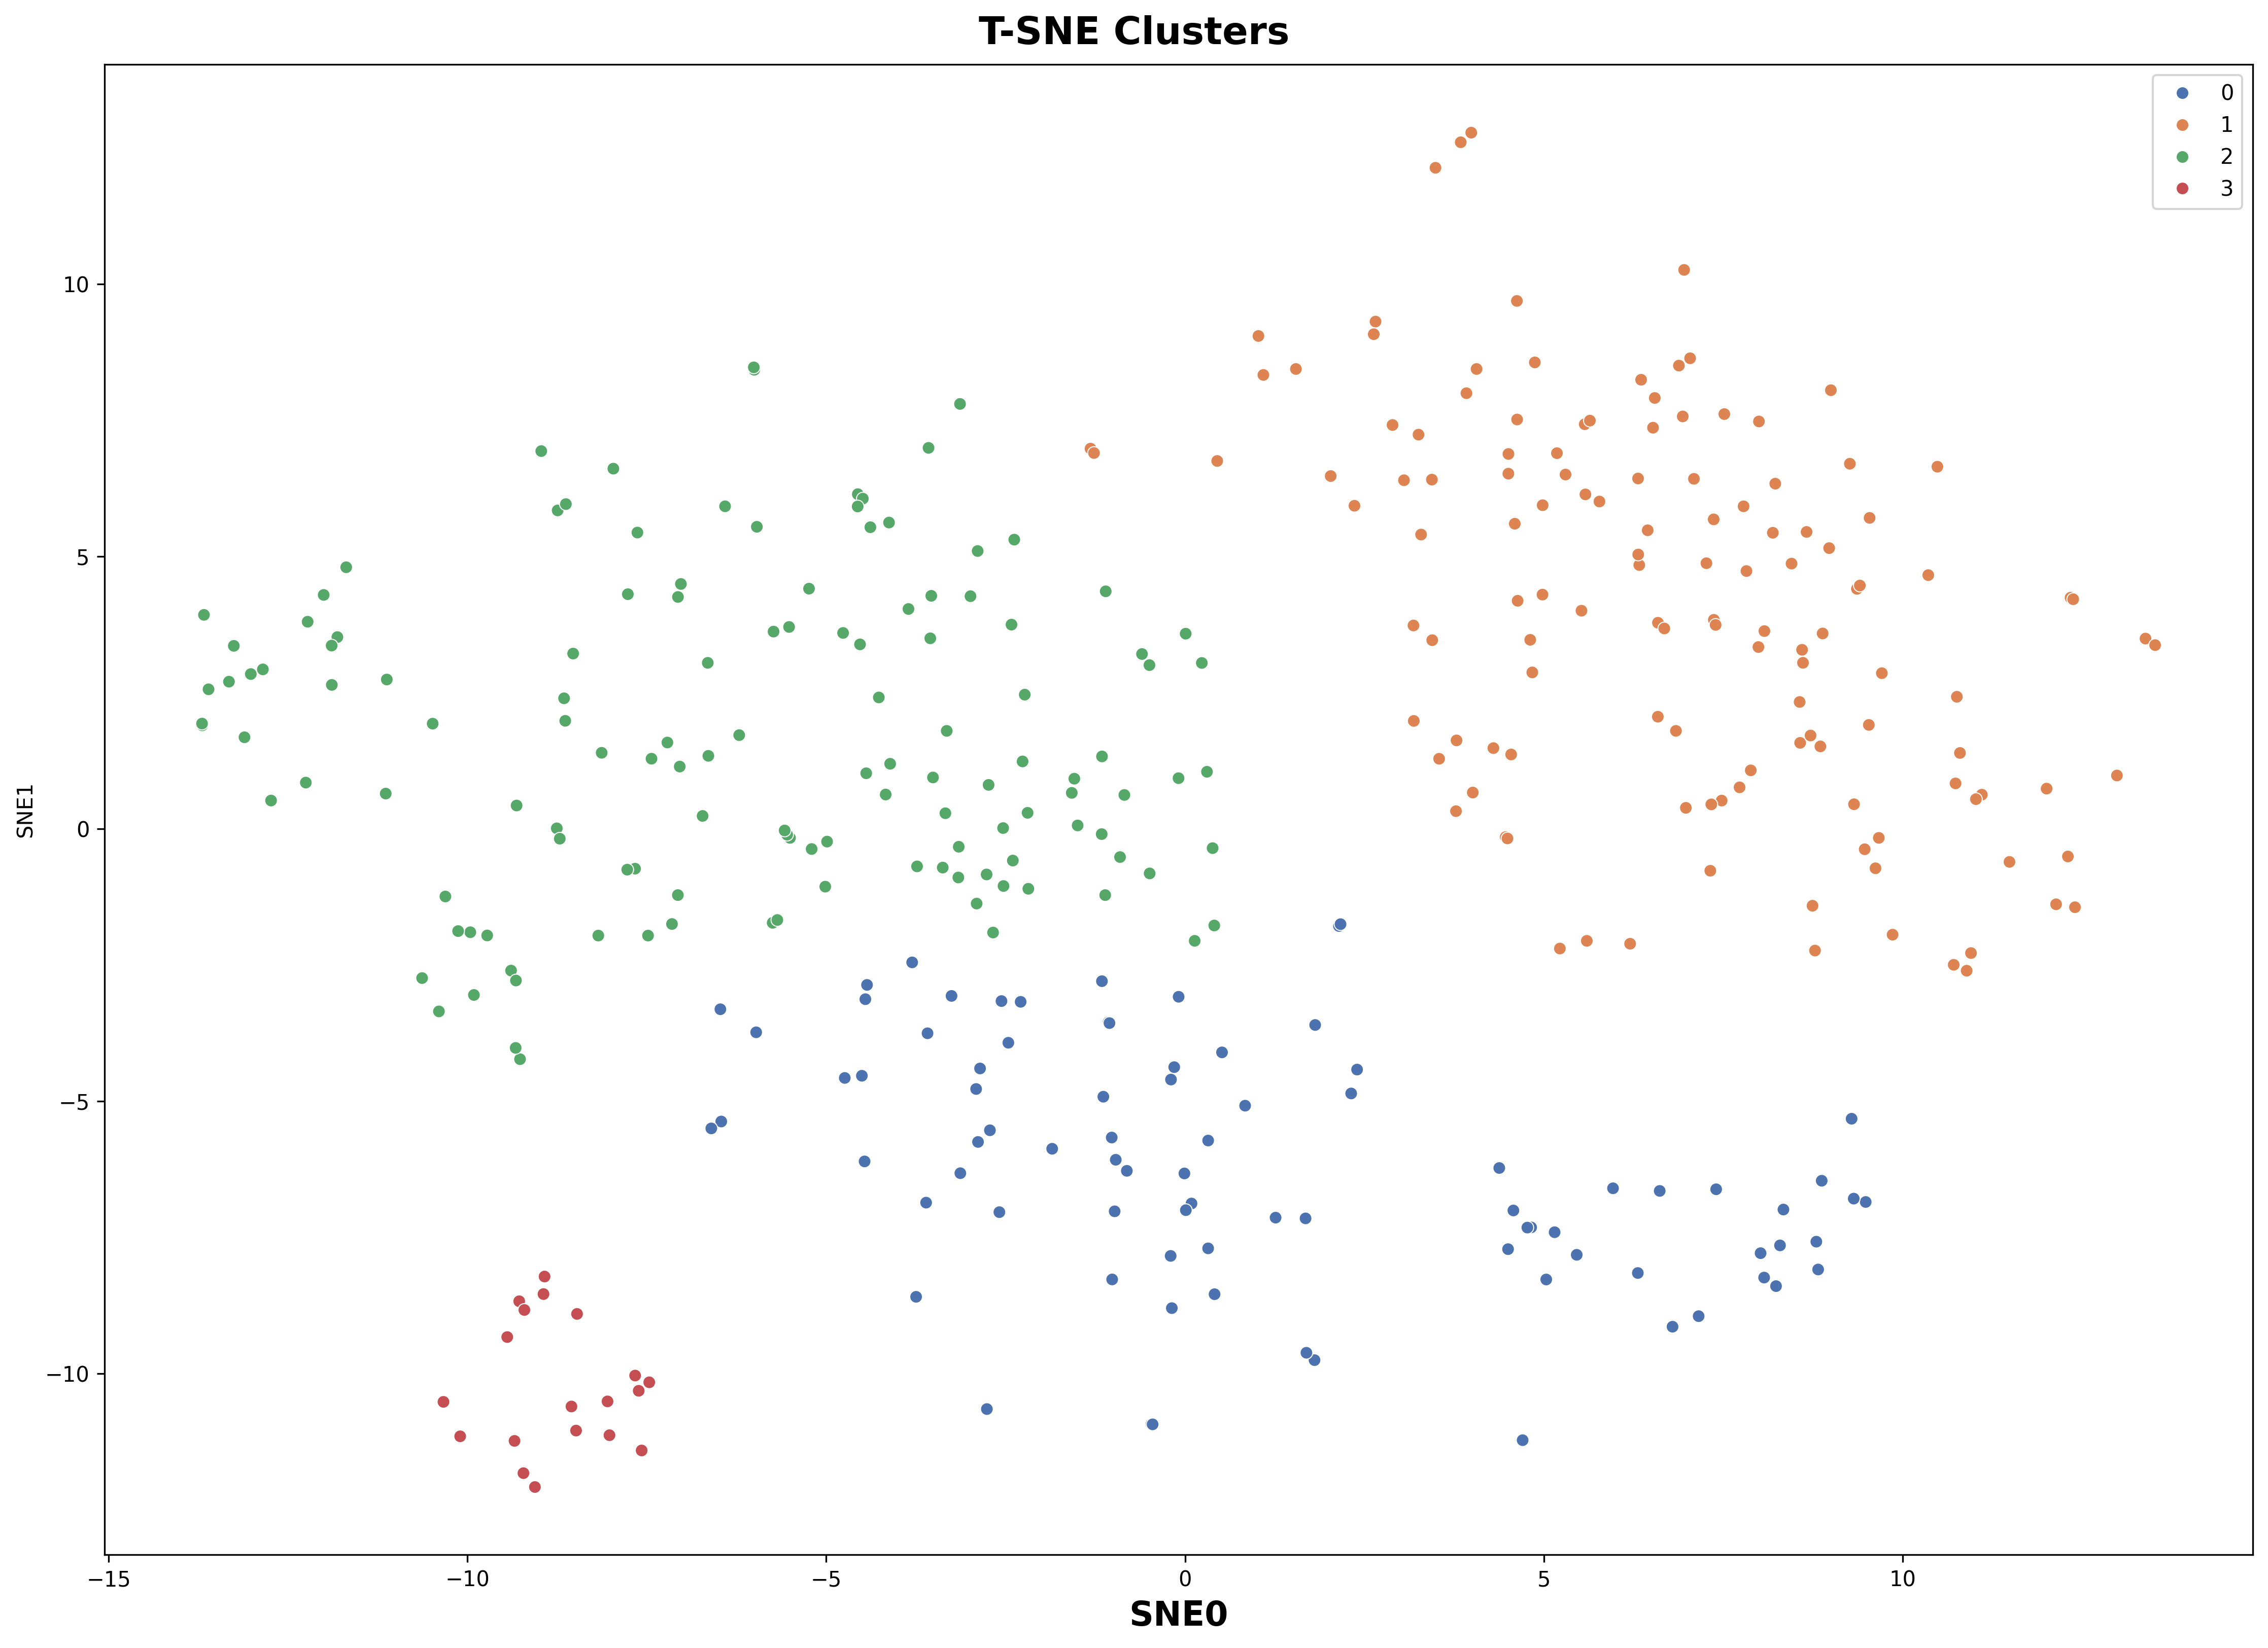

In [9]:
model = AgglomerativeClustering(n_clusters = 4, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(np.unique(model.labels_))
print(model.labels_.shape)

# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('SNE0', fontsize=16,fontweight='bold')
#ax1.set_xlim(99.7,99.9)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
#cmap = sns.light_palette('seagreen', as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    #hue_order=[0,2,3,],
    #fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
#plt.axvline(99.827, c='green')
#plt.annotate('99.827 %', xy =(99.825, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#plt.axvline(99.807, c='green')
#plt.annotate('99.807 %', xy =(99.805, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#sns.move_legend(obj = ax1, loc = 'best', labels=["Adelie", "Chinstrap", "Gentoo"])
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()
#-------------------END OF PLOT-------------





<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
7- اضافه کردن لیبل های محاسبه شده و سیو داده ها برای استفاده های بعدی 
</b>
</div>

In [12]:
df["labels"] = model.labels_
print(df.shape)
df.to_csv(f"{working_dir}/data/total_feed_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

(366, 31)


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
8- بررسی متغیرها با استفاده از خوشه بندی انجام شده 
</b>
</div>

In [13]:
df = pd.read_csv(f"{working_dir}/data/total_feed_with_labels.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)

(366, 31)


/tmp/ipykernel_14544/1362399772.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(


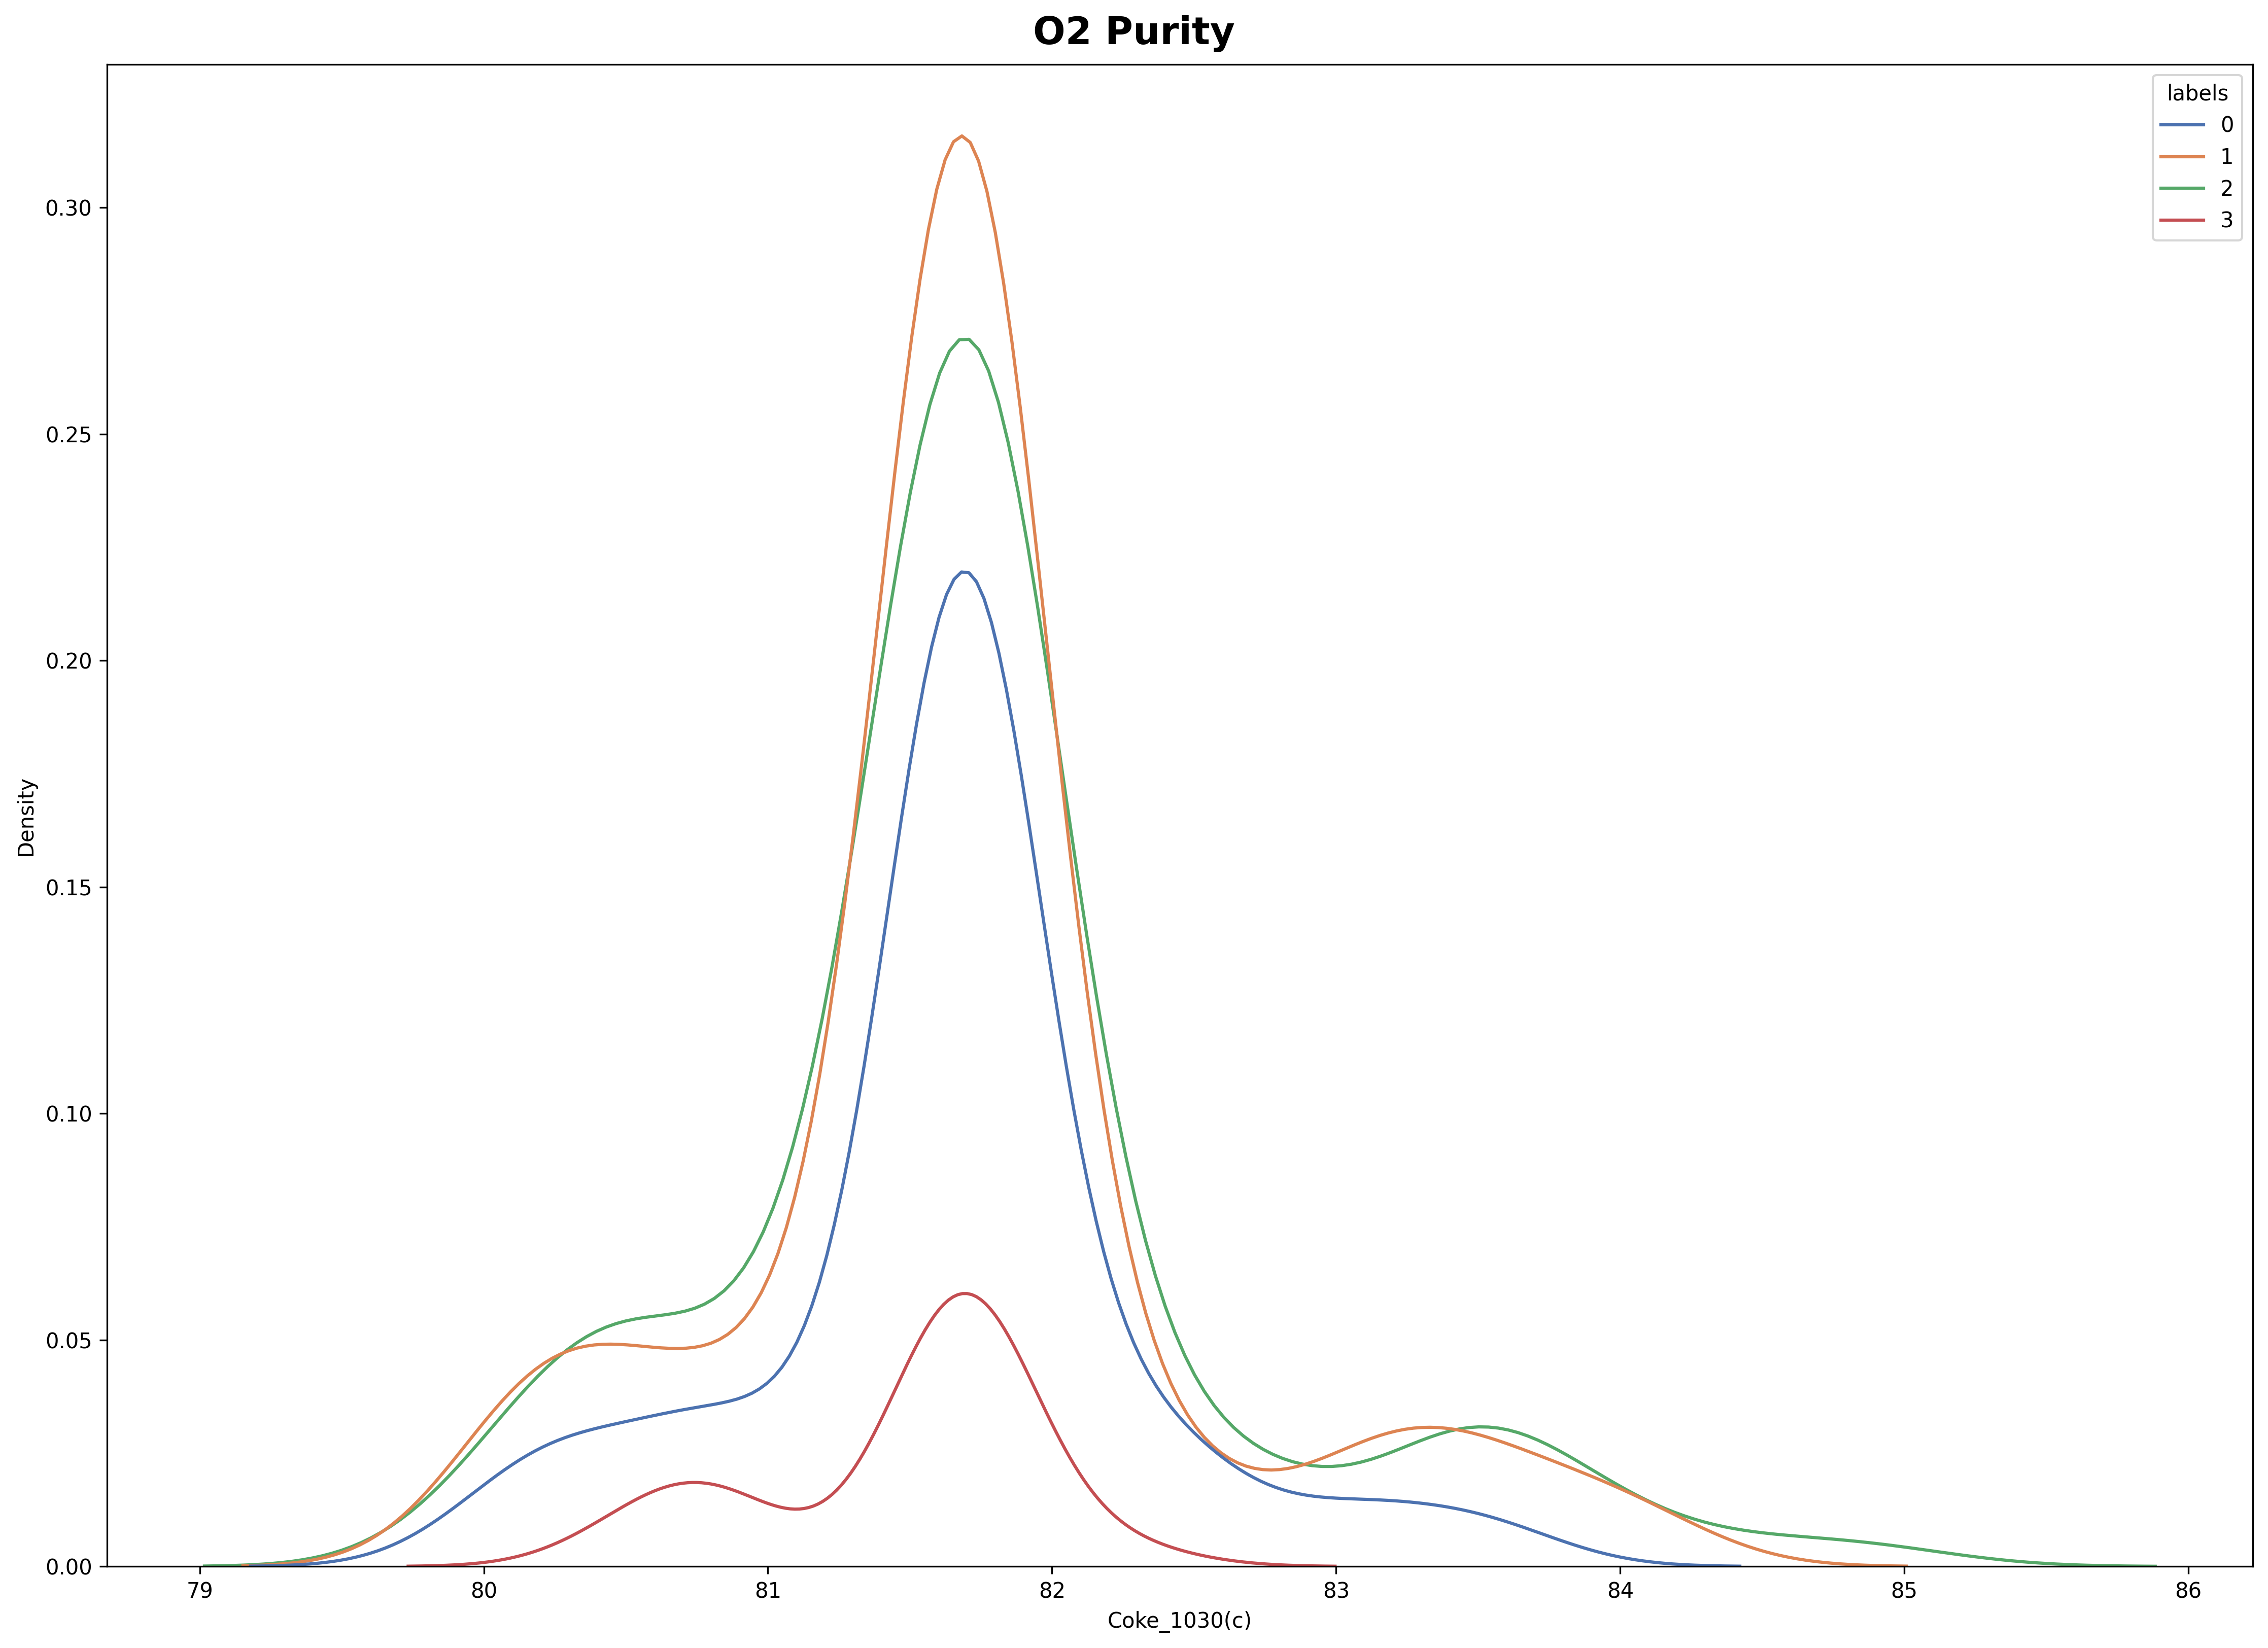

In [14]:
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('O2 Purity', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
#ax1.set_xlabel('Purity (%)', fontsize=16,fontweight='bold')
#ax1.set_xlim(99.7,99.9)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
#cmap = sns.light_palette('seagreen', as_cmap=True)
sns.kdeplot(
    data=df,
    x='Coke_1030(c)',
    hue="labels",
    #hue_order=[0,2,3,],
    fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
#plt.axvline(99.827, c='green')
#plt.annotate('99.827 %', xy =(99.825, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#plt.axvline(99.807, c='green')
#plt.annotate('99.807 %', xy =(99.805, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()

/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_14544/3276975663.py:9: UserWarning: The palette list has more values (10) than needed (4), which 

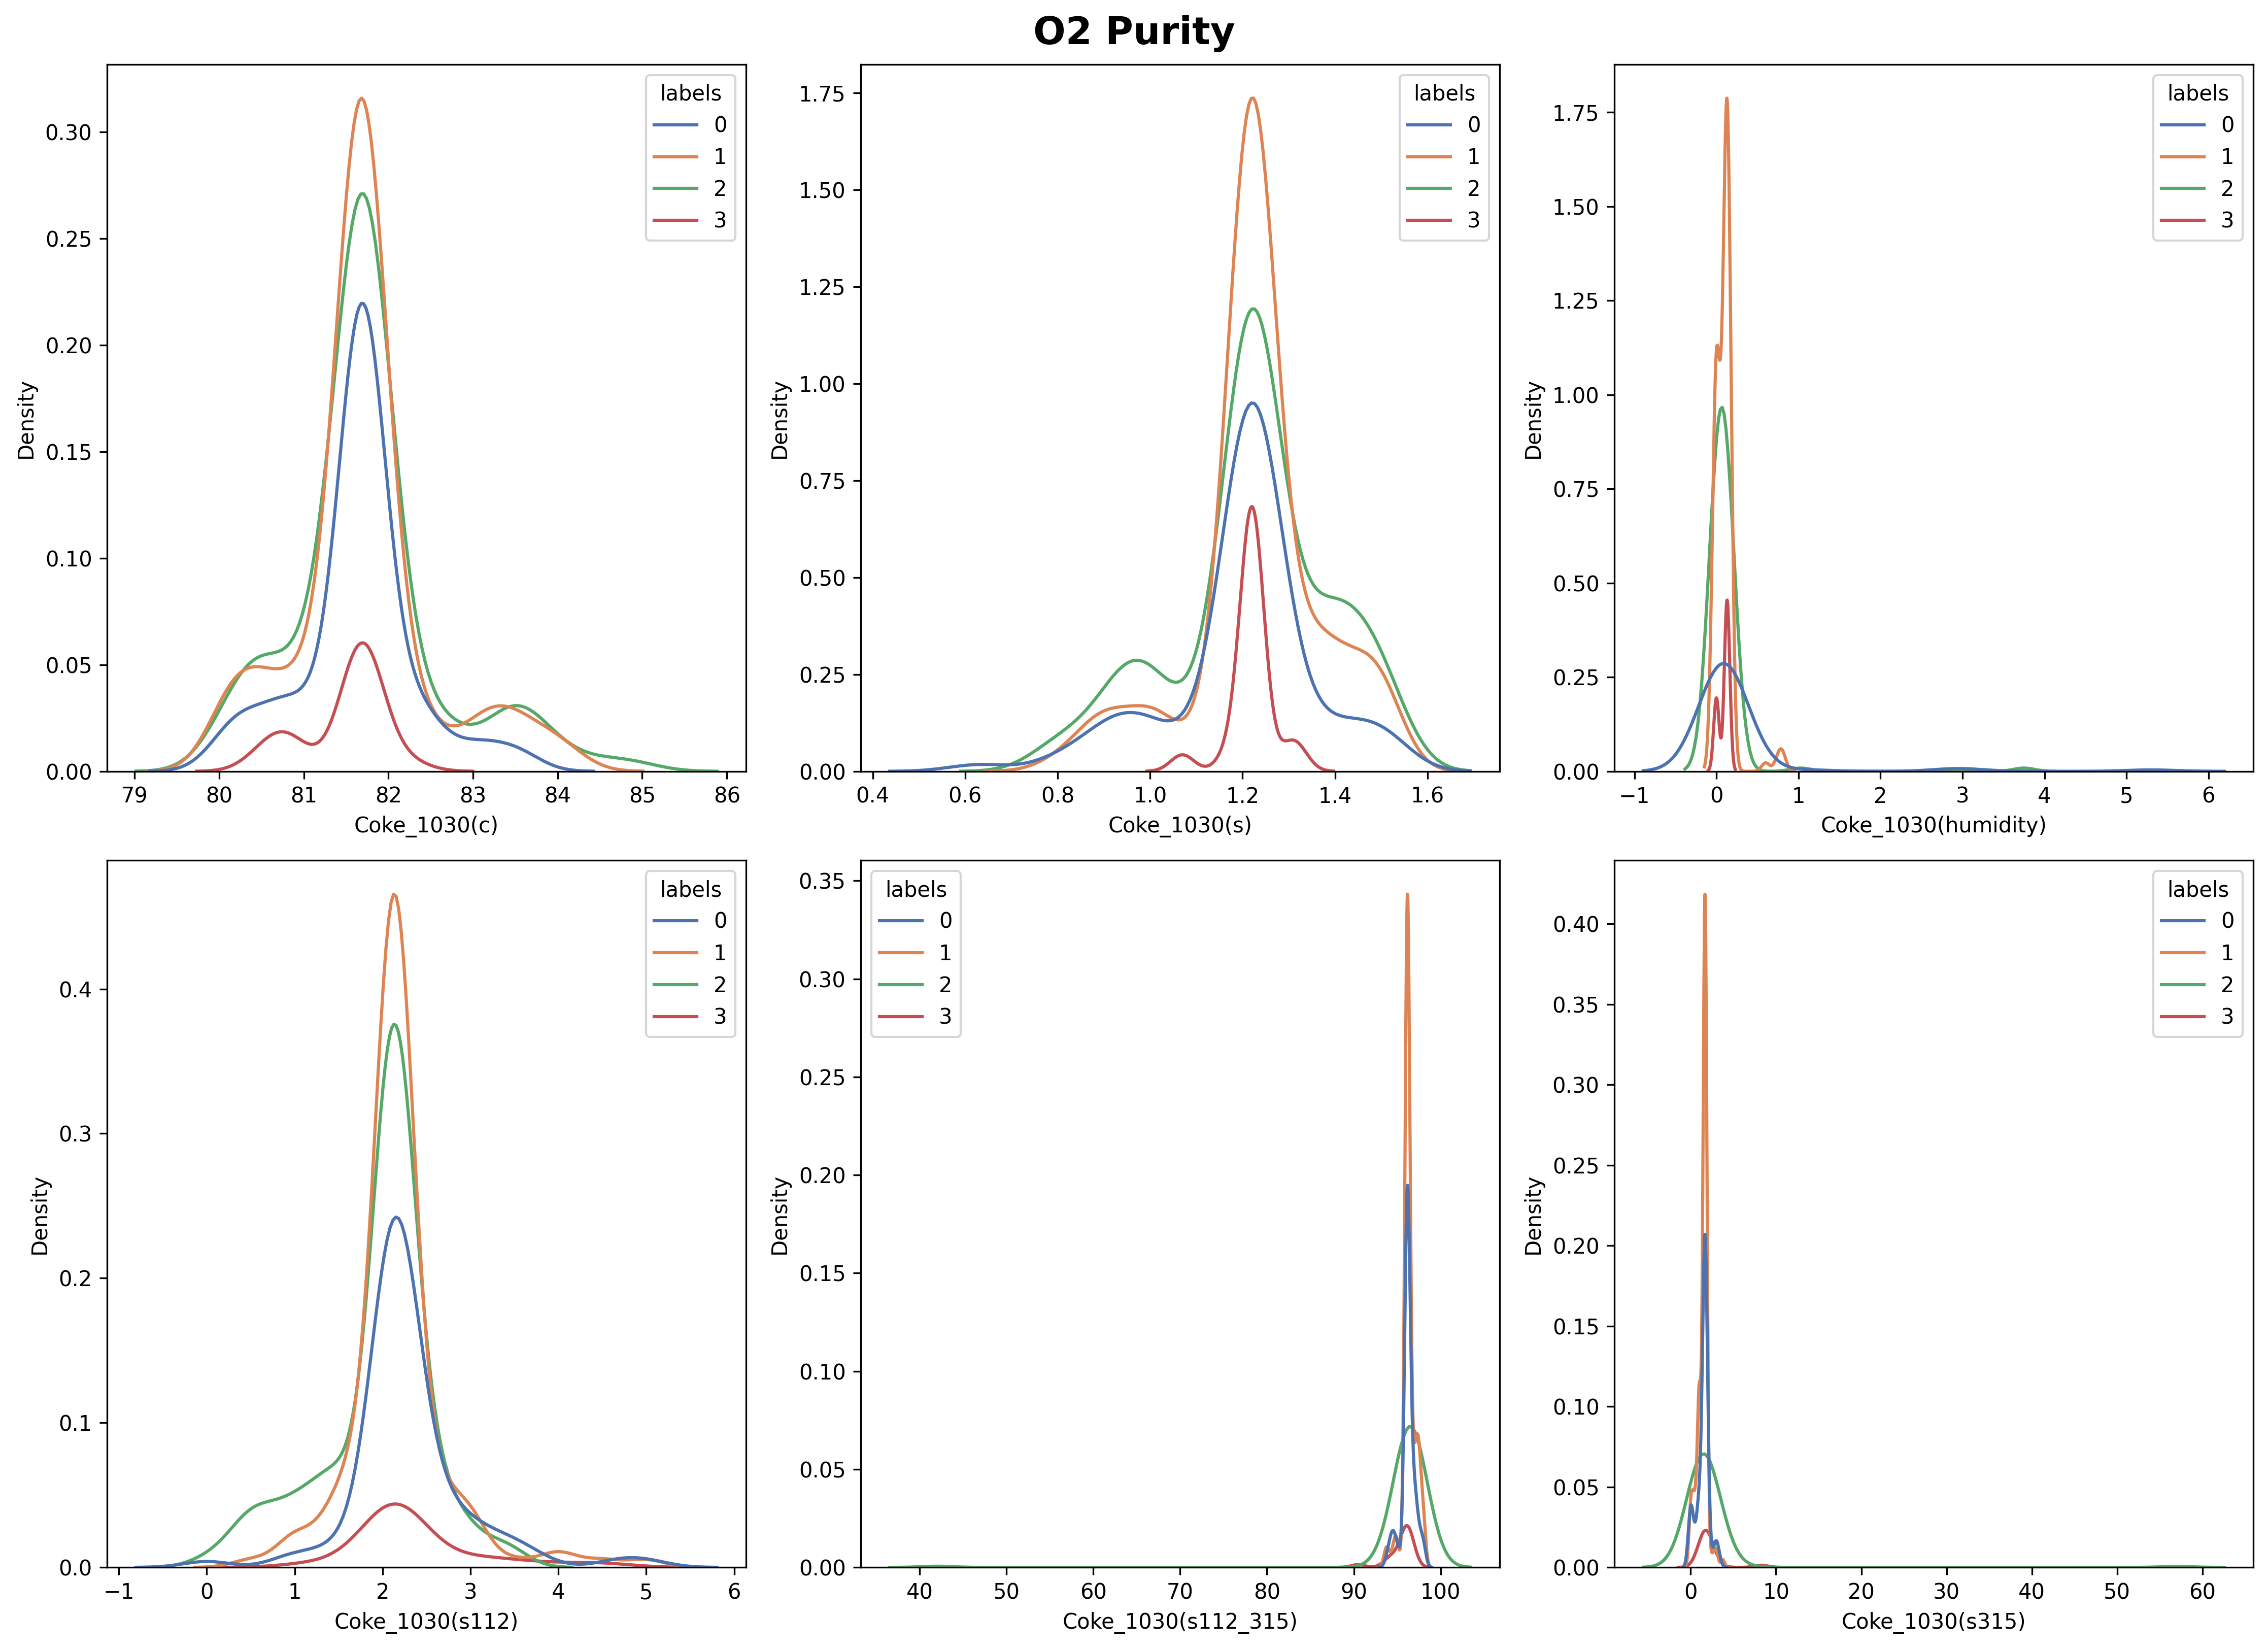

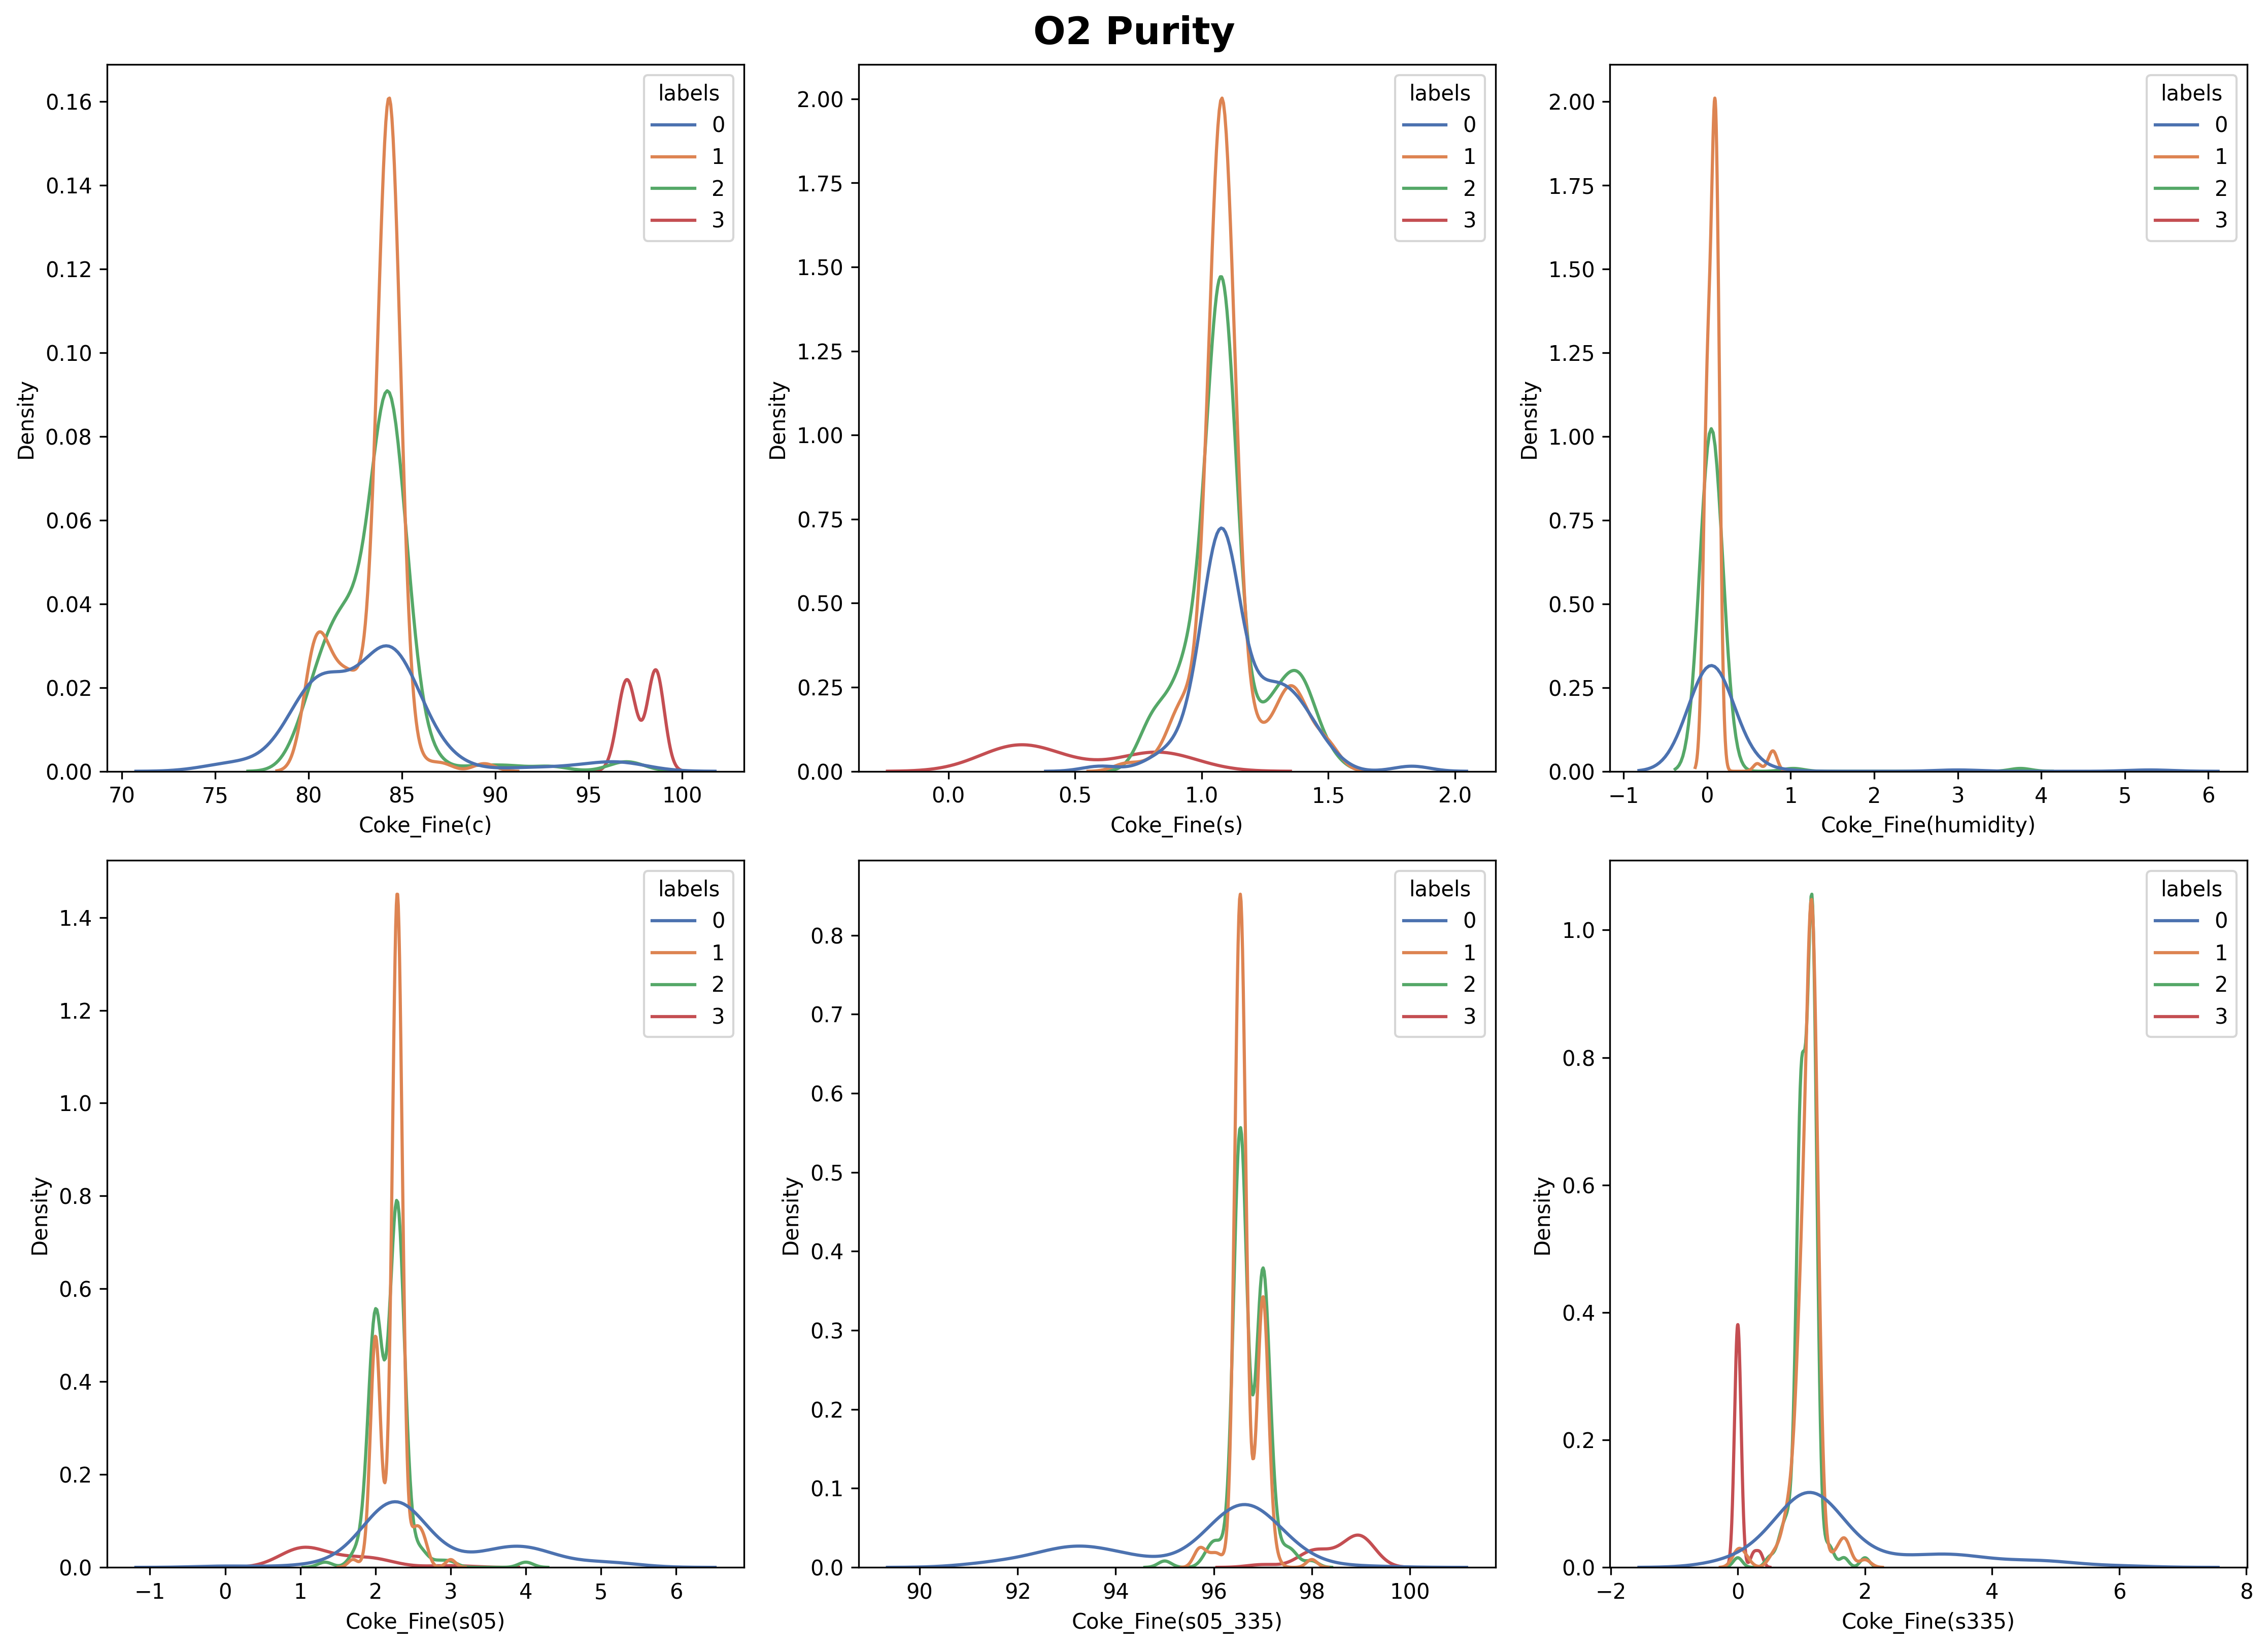

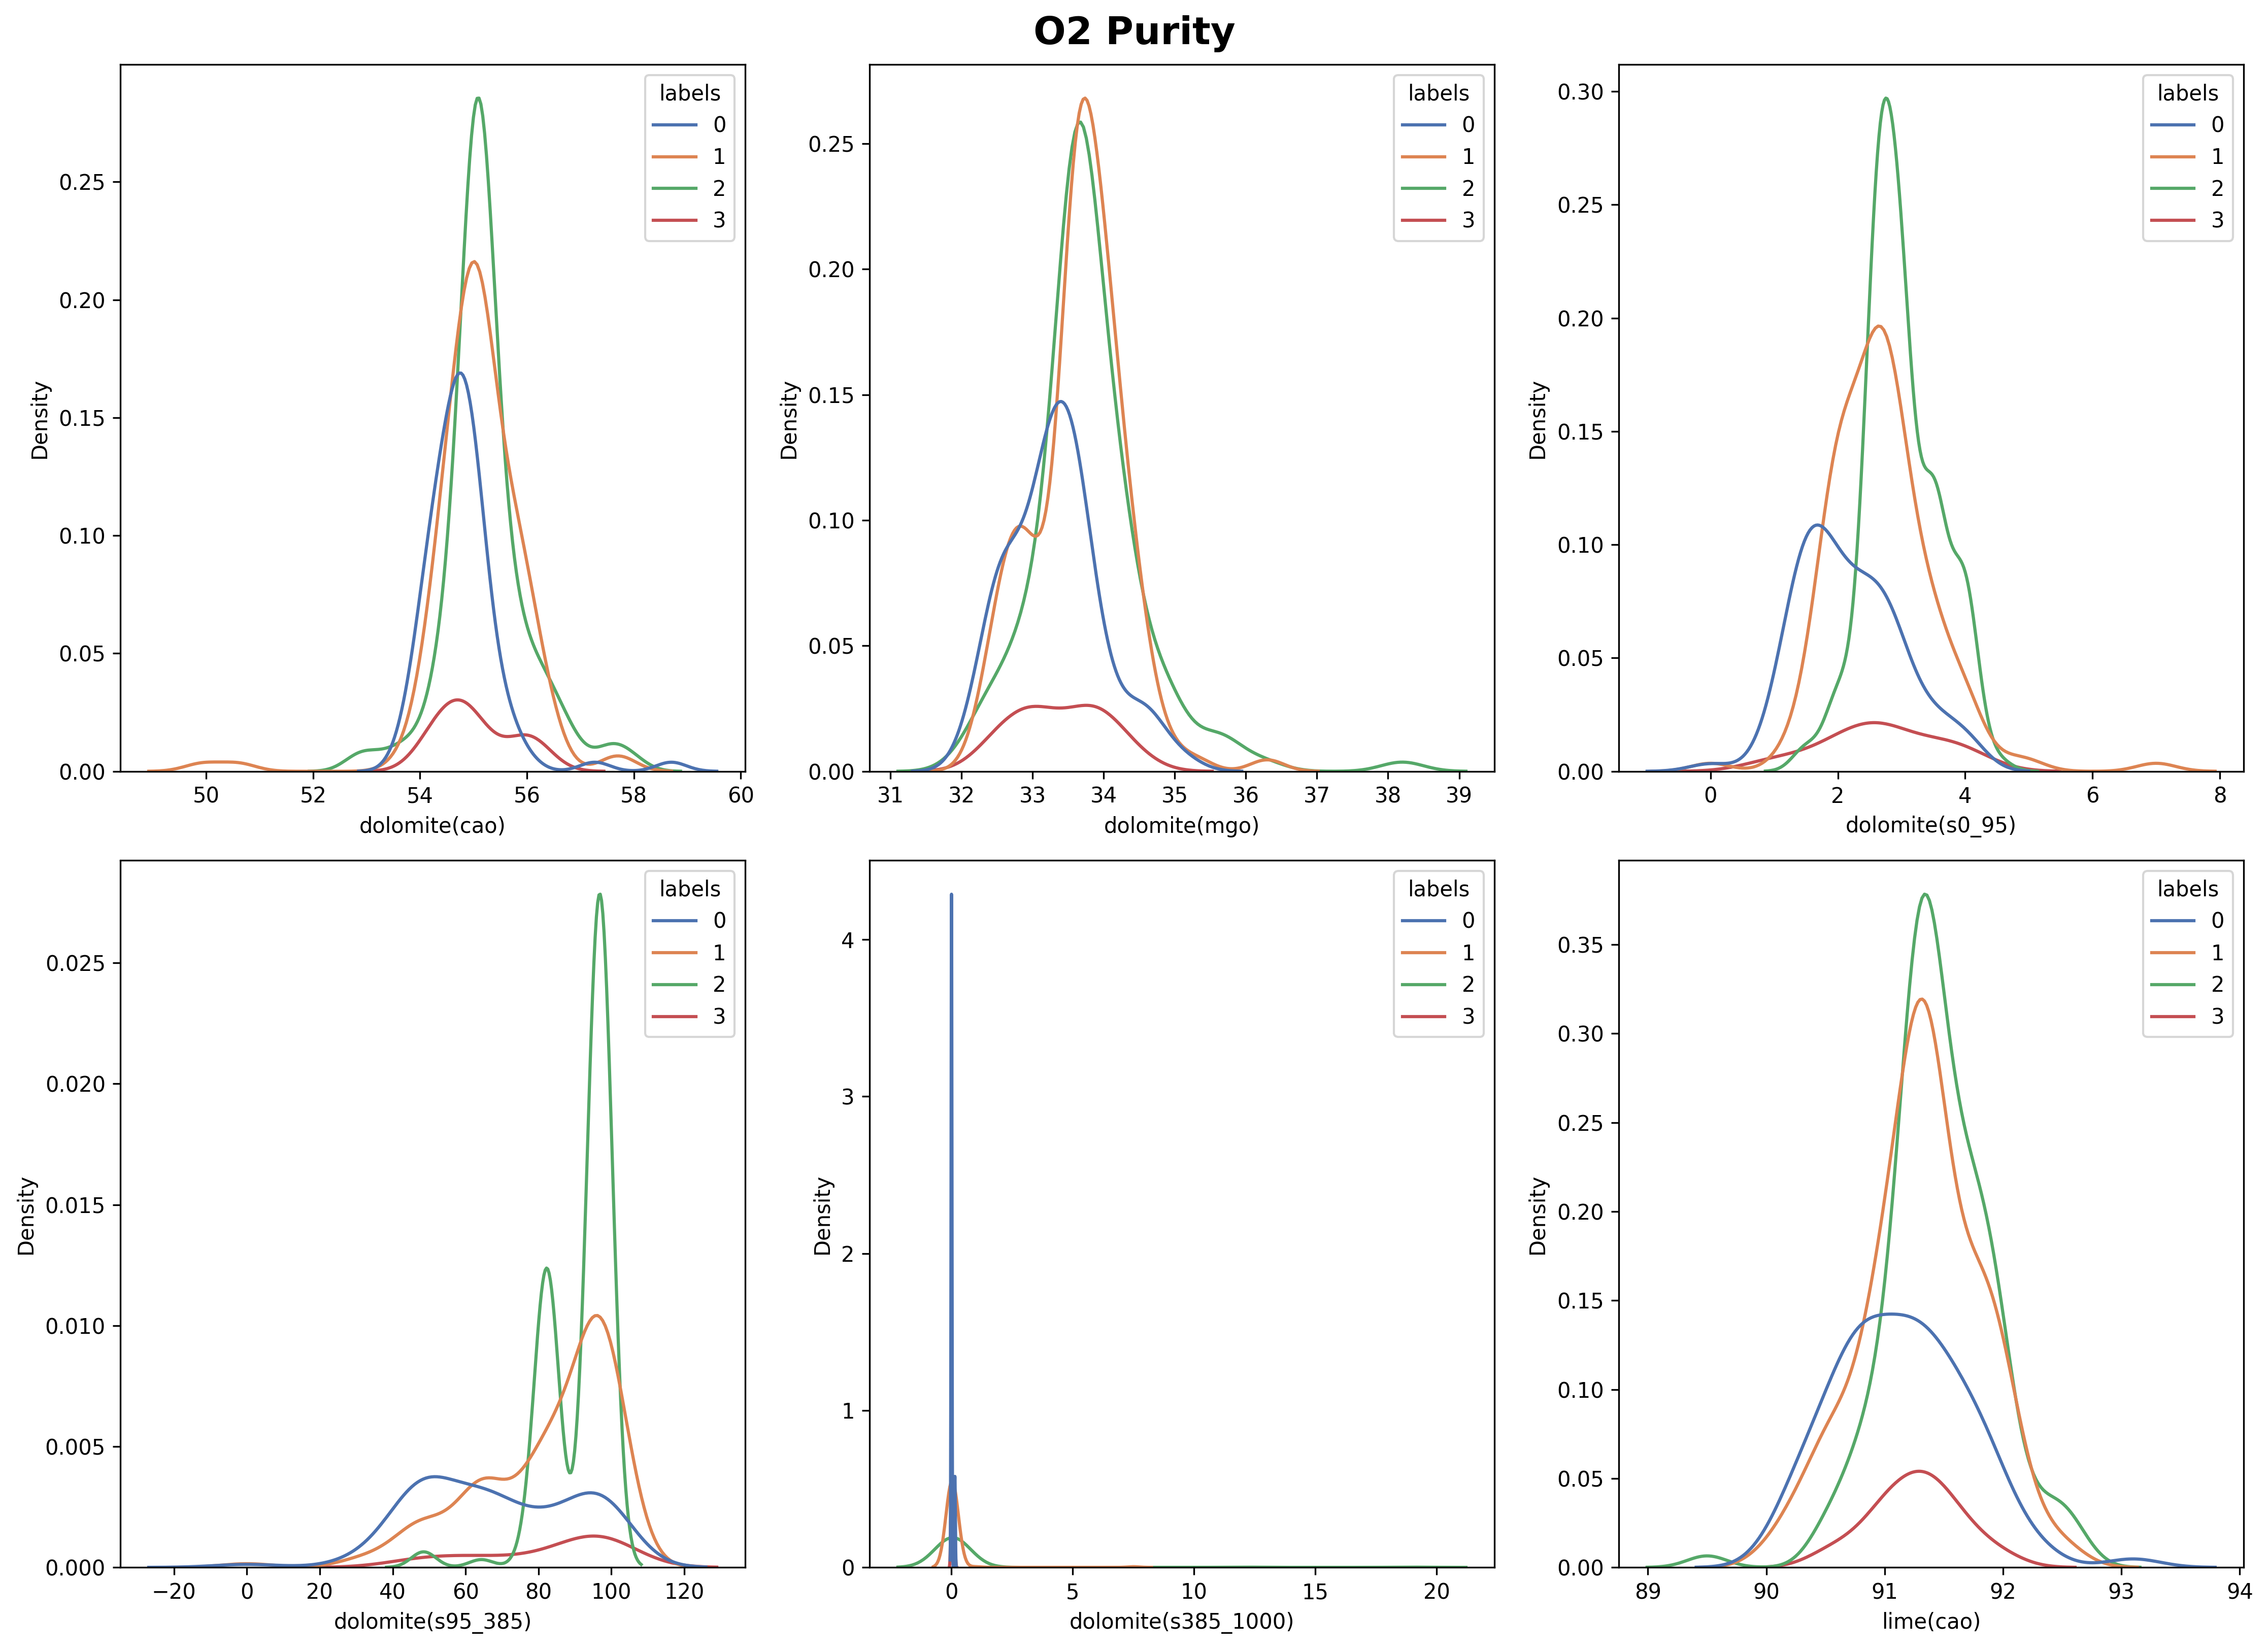

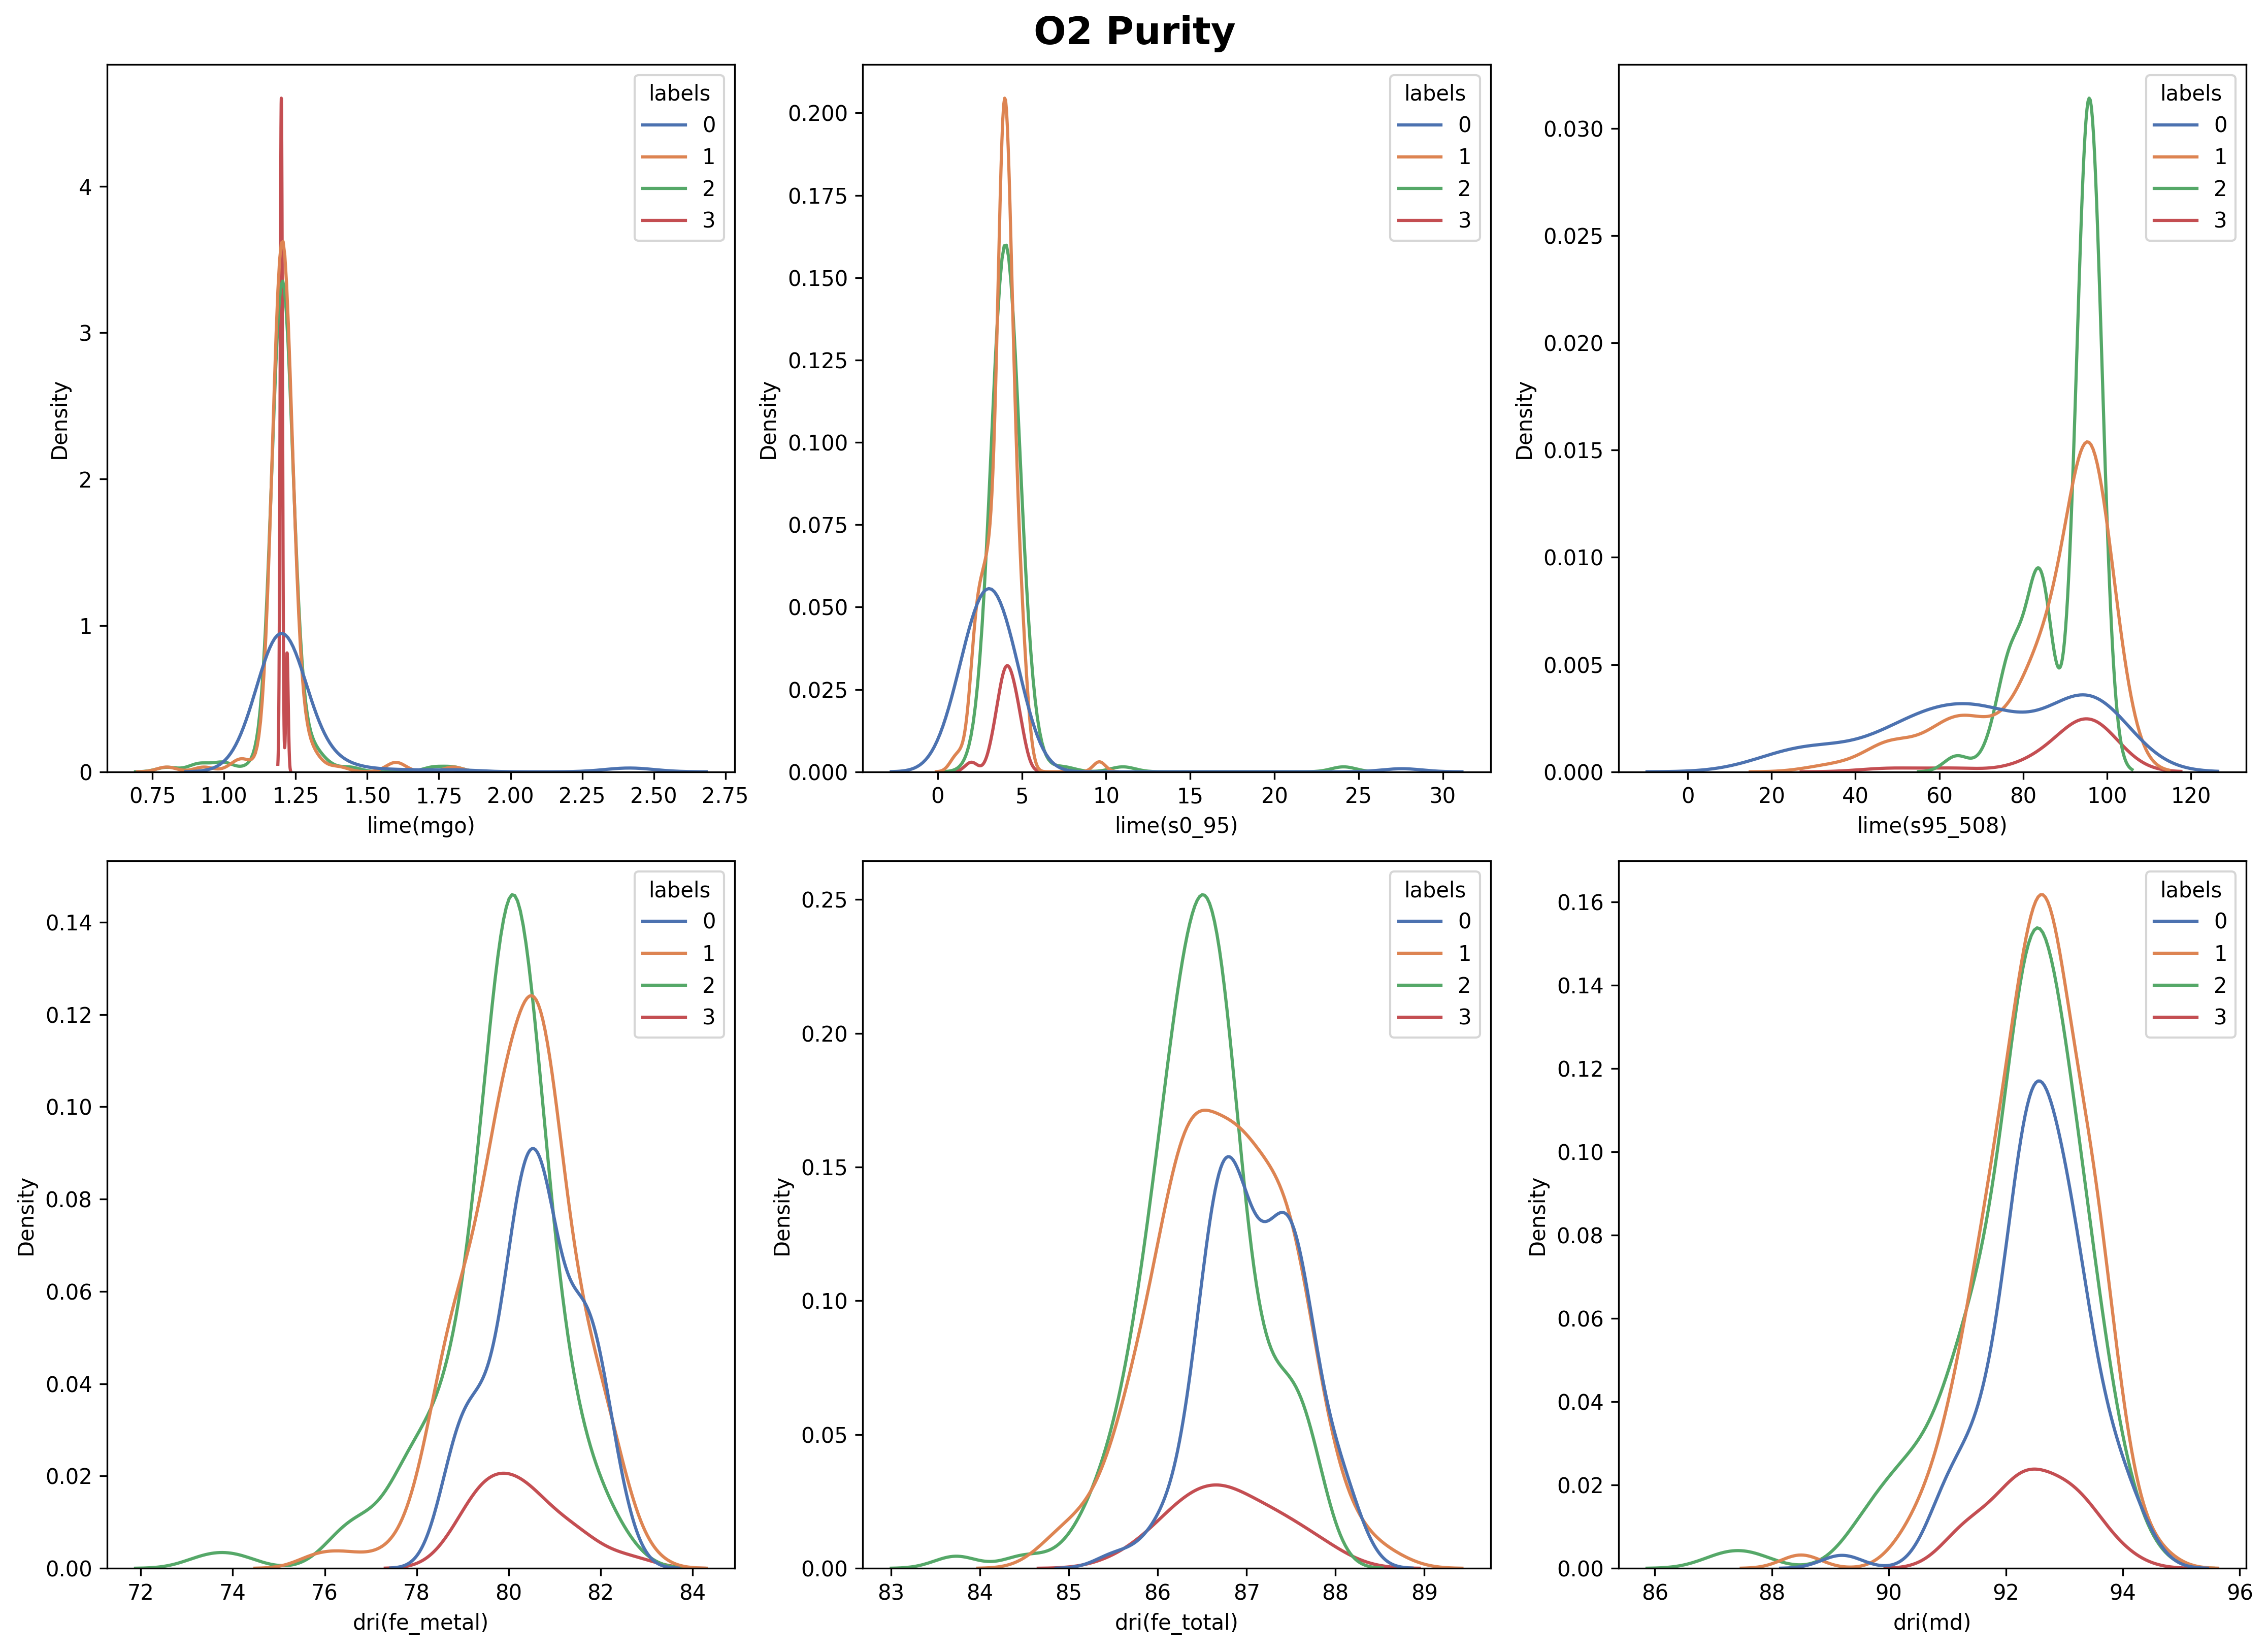

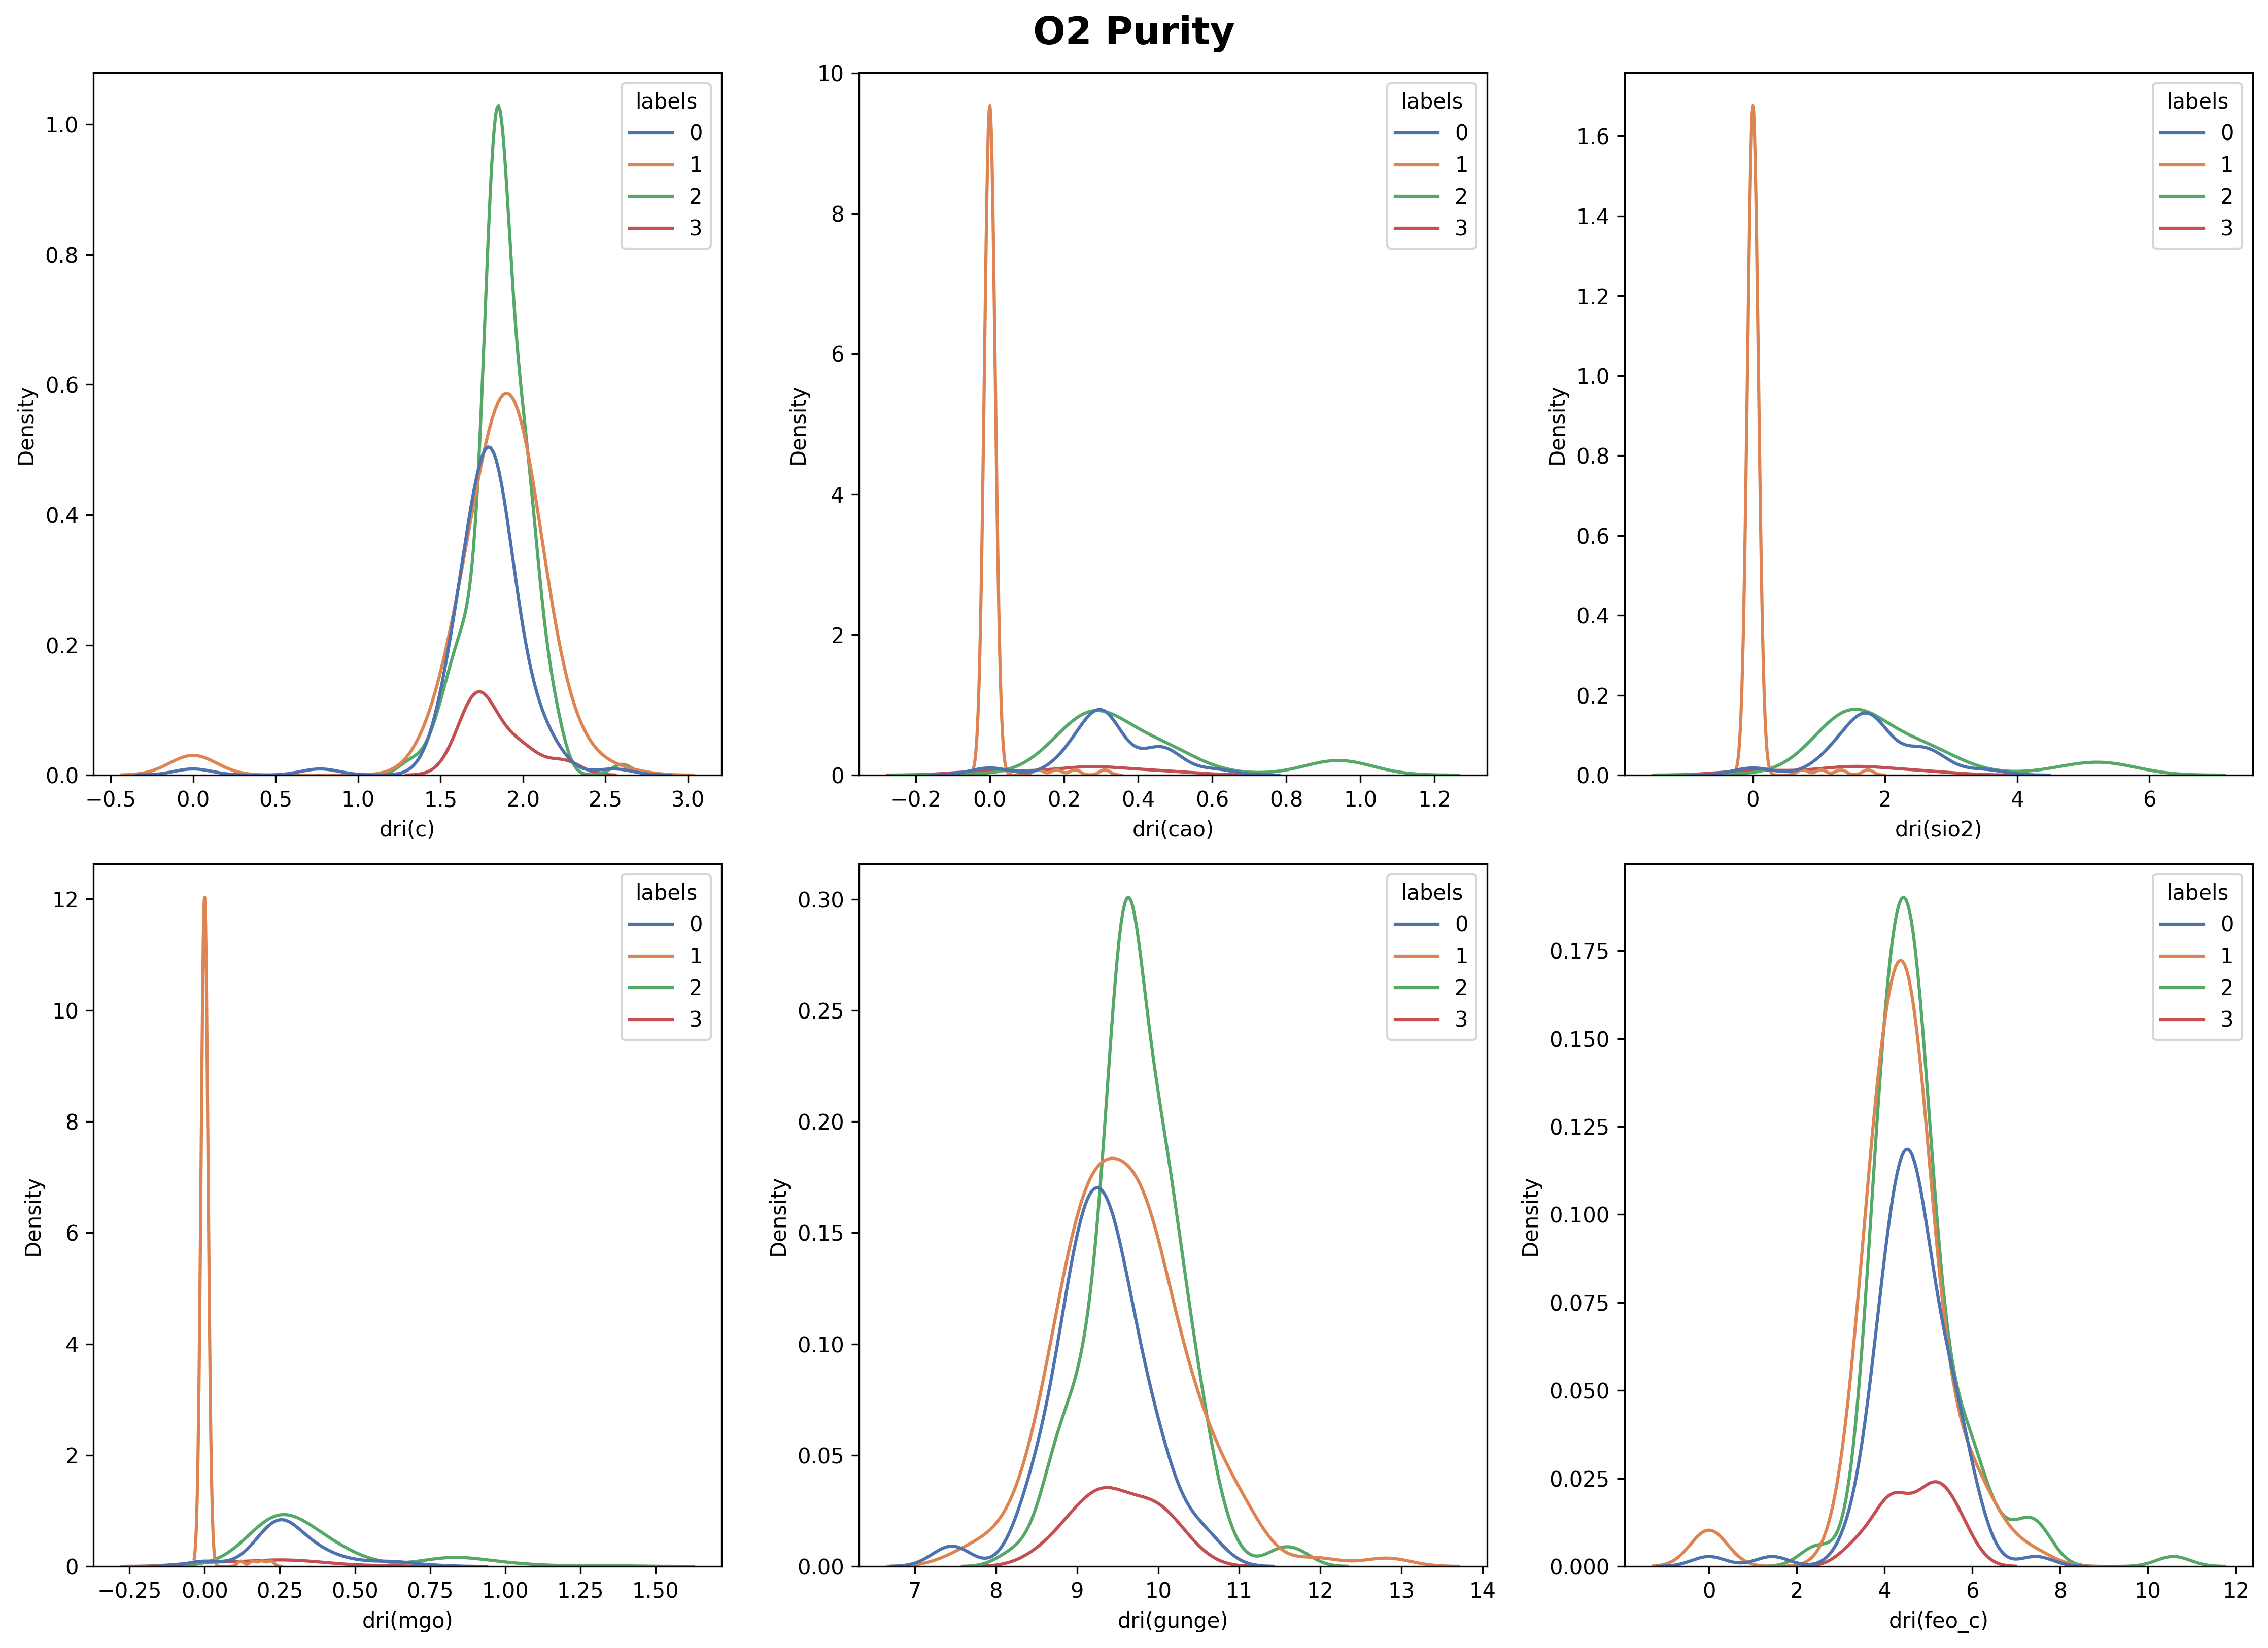

In [33]:
plot_name = df.columns
num = 0
for k in range(5):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('O2 Purity', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,3)
    for i in range(2):
        for j in range(3):
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
plt.show()